# Markov Chain Monte Carlo (MCMC) Analysis

Using the [MCMC chains](https://github.com/Milne-Centre/ThaiPASS2024/tree/main/Cosmology/plik_HM_TTTEEE), we will analyze the posterior density distribution and derive some useful statistics.  We shall use <tt>getdist</tt> package for this task.  You can read its tutorial [HERE](https://getdist.readthedocs.io).  In the MCMC chain directory, there will be a file with the <tt>.paramnames</tt> extension that lists the names of the parameters and their LaTeX names. Parameters ending with an asterisk are derived parameters.


## Task 1

Setting the root file as

    file_root = 'plik_HM_TTTEEE/planck2018_plik_rd12_HM_v22_TTTEEE'

1. Plot the 1D posterior probability distribution for the parameter <tt>H0</tt>, <tt>omegal</tt>, <tt>omegam</tt>.
2. Find the 68% and 95% interval of these parameters.  
3. Indicate the 68% and 95% ranges in your plots and 95% confidence level as in the example.  You may have a look at <tt>axvspan</tt> command.

<b>Note: You should ignore the first half of the chain in the burn-in stage.</b>

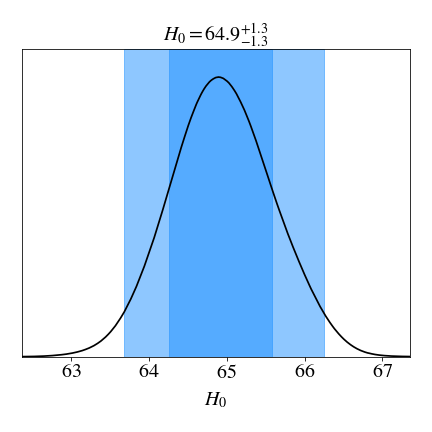

## Task 2

1. Plot the 68% and 95% martinalized 2D contour plots for the parameters <tt>H0</tt>, <tt>omegal</tt>, <tt>omegam</tt>. <br> Discuss the correlations between these parameters.
2. Derive the maximum likelihood values of these parameters (not the mean values).

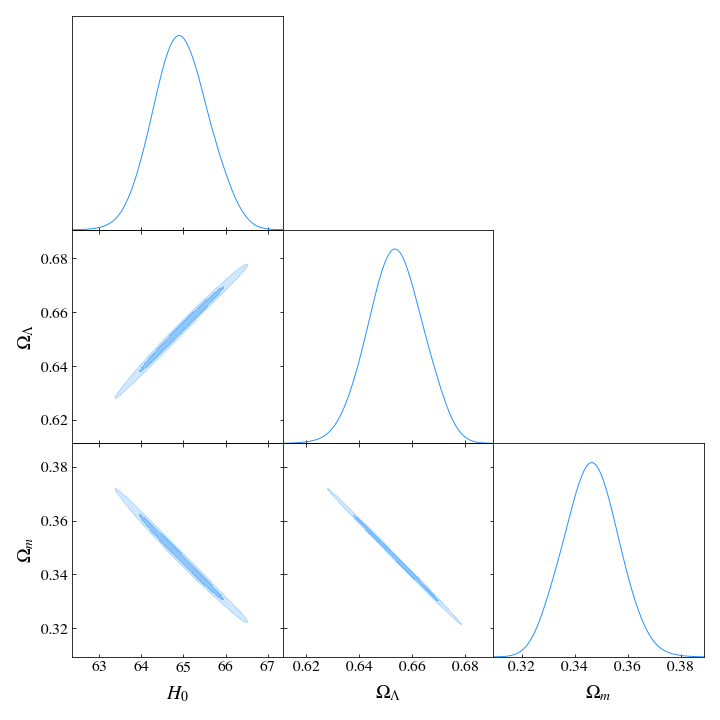

## Task 3

In this task, we will use the [Cosmic Linear Anisotropy Solving System (CLASS)](https://lesgourg.github.io/class_public/class.html), a cosmological written in C.  However, since this is a Python workshop, we will use the Python wrapper for CLASS, called <tt>classy</tt>.  To install <tt>classy</tt>, run the following command:

    pip install classy

This will allow us to interface with CLASS using Python, making it easier to integrate into Python code. 

Now following instruction in [Python-wrapper example](https://github.com/lesgourg/class_public/wiki/Python-wrapper).  

1. Run CLASS using the maximum likelihood parameter values obtained from the MCMC chains. <br> We only need the angular power spectrum <tt>'tCl'</tt> only.
2. You may need to find the values of additional parameters, beyond those used in the previous task, to provide the full set of input parameters required by CLASS.  You can see what are the input parameters for CLASS in [explanatory.ini](https://github.com/lesgourg/class_public/blob/master/explanatory.ini)
3. Compute the age of the universe.
4. Plot the comoving distance, luminosity distance and angular diameter distance as a function of redshift $z \in [0,10]$.
5. Plot the angular power spectrum
$$
    D_\ell \equiv \frac{\ell (\ell + 1)}{2 \pi} C_\ell
$$
You can download the data [HERE](https://github.com/Milne-Centre/ThaiPASS2024/blob/main/Cosmology/cl_normalized.npy) and compare with the angular correlation function from <tt>classy</tt>.  You result shoule look something like this.

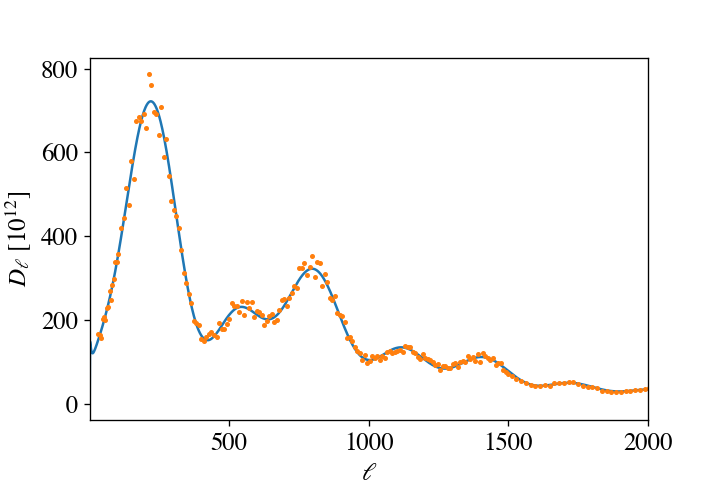

# Hint for Task 3

For those who cannot get the maximum likelihood values you could use the mean values or use my <tt>params</tt>

    from classy import Class

    params = {
        'output': 'tCl',
        'l_max_scalars': 2500,
        'A_s': 2.556244218291325e-9,
        'n_s': 0.9500409909616475, 
        'H0': 64.92666376865459,
        'tau_reio': 0.16319259878255687,
        'omega_b': 0.032872472376343324,
        'omega_cdm': 0.19094772100766433}

    cosmo = Class()
    cosmo.set(params)
    cosmo.compute()